In [179]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


loading the dataset

In [180]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


looking at x_train and y_train dimensions

In [181]:
X_train.shape


(50000, 32, 32, 3)

In [182]:
y_train.shape

(50000, 1)

In [183]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)


y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [184]:
y_train = y_train.reshape(-1,)

In [185]:
y_test = y_test.reshape(-1,)

In [186]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

let's do some plotting

In [187]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

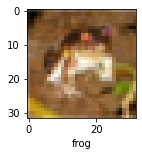

In [188]:
plot_sample(X_train, y_train, 0)

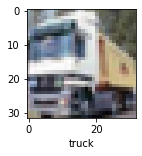

In [189]:
plot_sample(X_train, y_train, 1)

normalizing training data

In [190]:
X_train = X_train / 255.0

In [191]:
X_test = X_test / 255.0

building a CNN model

In [207]:
cnn = models.Sequential(
  #   layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), name='conv2d_1'),
  #  layers.MaxPooling2D((2, 2)),
    
  #  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv2d_2'),
  #  layers.MaxPooling2D((2, 2)),
    
  #  layers.Flatten(),
  #  layers.Dense(64, activation='relu'),
  #  layers.Dense(10, activation='softmax')
)

# Step 1 - Convolution
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3), name='layer_1', activation = 'relu', trainable = False))
#cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5)) # antes era 0.25

# Adding a second convolutional layer
cnn.add(Conv2D(64, (3, 3), padding='same', activation = 'relu', name='layer_2', trainable = False))
#cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5)) # antes era 0.25

# Adding a third convolutional layer
cnn.add(Conv2D(64, (3, 3), padding='same', activation = 'relu', name='layer_3', trainable = False))
#cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5)) # antes era 0.25

# Adding a fourth convolutional layer
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3), name='layer_4', activation = 'relu', trainable = True))
#cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5)) # antes era 0.25


# Step 3 - Flattening
cnn.add(Flatten())
# Step 4 - Full connection
cnn.add(Dense(units = 64, activation = 'relu'))
#cnn.add(Dropout(0.5)) 
cnn.add(Dense(units = 10, activation = 'softmax'))

In [208]:
# lr = 2e-4
# decay = 6e-8

# optimizer = tf.keras.optimizers.legacy.RMSprop(lr=lr, decay=decay)

# cnn.compile(optimizer = optimizer,
#                    loss = 'mse', 
#                    metrics = ['accuracy'])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [209]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 2.2733 - accuracy: 0.1318
Epoch 2/10
1563/1563 [==============================] - 34s 21ms/step - loss: 2.2039 - accuracy: 0.1771
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1779 - accuracy: 0.1921
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1665 - accuracy: 0.1979
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1560 - accuracy: 0.2047
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1496 - accuracy: 0.2069
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1434 - accuracy: 0.2124
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1426 - accuracy: 0.2112
Epoch 9/10
1563/1563 [==============================] - 34s 21ms/step - loss: 2.1341 - accuracy: 0.2164
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [210]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 2.6185 - accuracy: 0.1124


[2.618450880050659, 0.11240000277757645]

predicting using the model

In [211]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 17ms/step


array([[0.03055668, 0.05455397, 0.15334061, 0.09109011, 0.23620275,
        0.06268133, 0.24535961, 0.08012653, 0.02008276, 0.02600564],
       [0.03275663, 0.0573566 , 0.15544653, 0.09063922, 0.22621876,
        0.06331594, 0.24336855, 0.08025803, 0.02196033, 0.02867947],
       [0.03095627, 0.05560553, 0.15349497, 0.09291212, 0.21650705,
        0.06592699, 0.24710558, 0.0848812 , 0.02063908, 0.03197104],
       [0.03109534, 0.05475448, 0.15422243, 0.09233553, 0.23185225,
        0.06347845, 0.24332187, 0.08194952, 0.02040071, 0.02658945],
       [0.02593424, 0.04954823, 0.14514835, 0.09403319, 0.25200582,
        0.06620413, 0.2435034 , 0.08208669, 0.01721844, 0.02431757]],
      dtype=float32)

In [212]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[6, 6, 6, 6, 4]

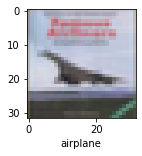

In [213]:
plot_sample(X_test, y_test,3)

In [214]:
classes[y_classes[3]]

'frog'

passing an image in the 'cnn' model and looking at the output in each layer

In [215]:
# Extracts the outputs of the top 10 layers
layer_outputs = [layer.output for layer in cnn.layers[:10]] 

#Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=cnn.input, outputs=layer_outputs) 

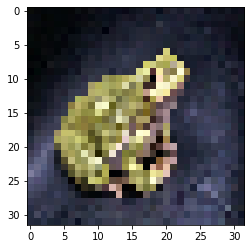

(1, 32, 32, 3)


In [216]:
img_path = 'frog.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(32, 32))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [217]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

1/1 [==============================] - 0s 74ms/step


In [218]:
print(first_layer_activation.shape)

(1, 32, 32, 32)


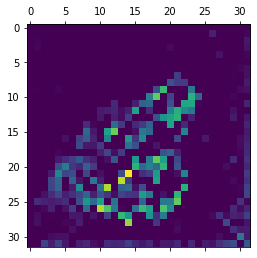

In [219]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Visualizing every channel in every intermediate activation

<ipython-input-220-34e2718c48da>:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


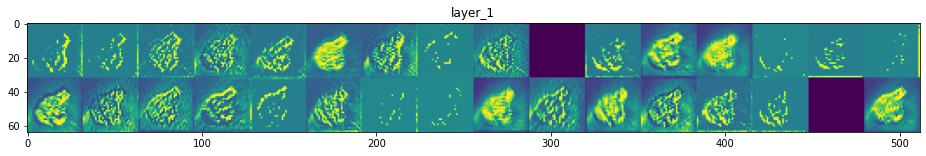

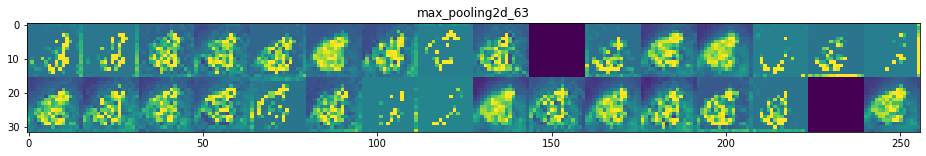

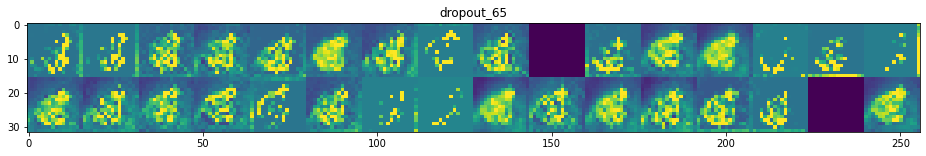

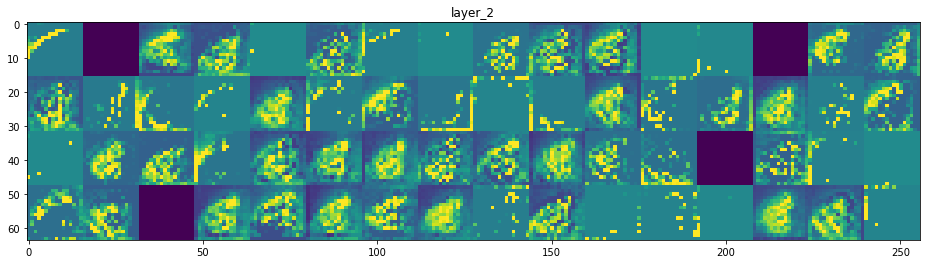

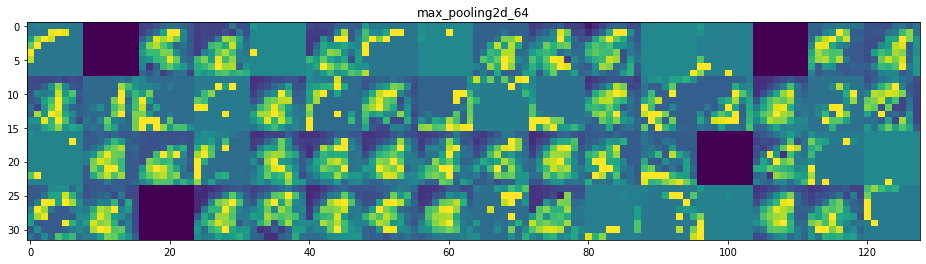

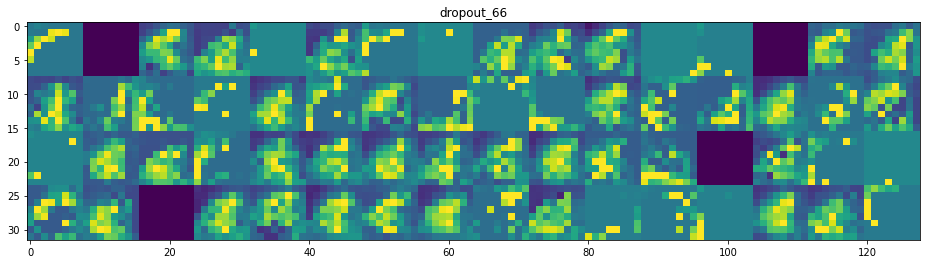

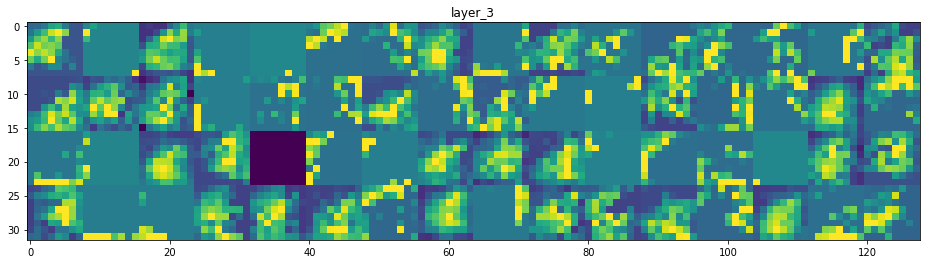

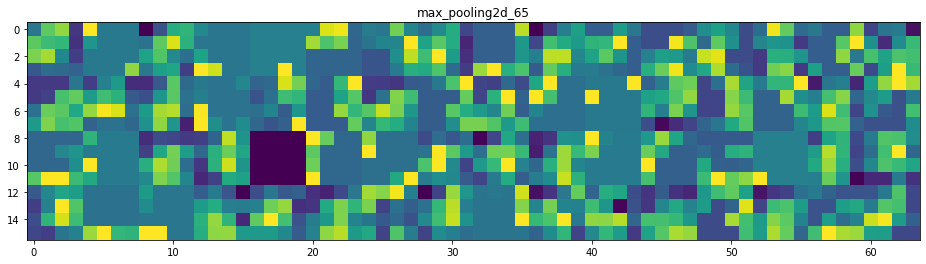

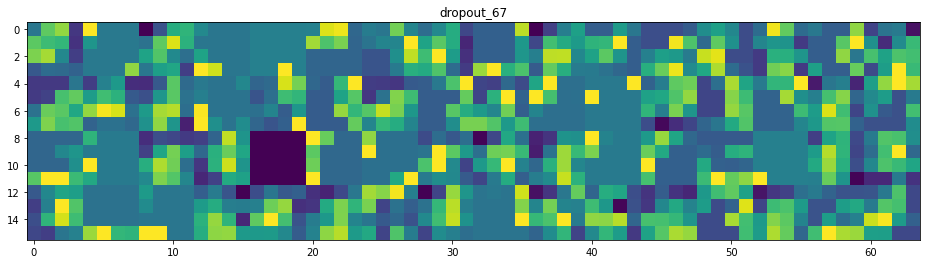

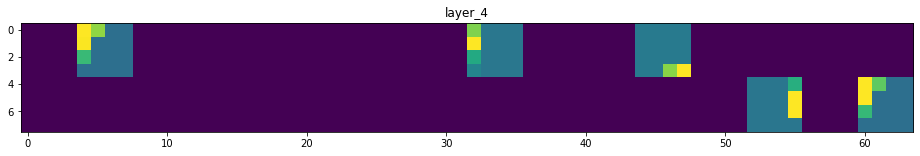

In [220]:
layer_names = []
for layer in cnn.layers[:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')